In [1]:
import pandas as pd

cv_df = pd.read_csv('first_run_cv.csv')

In [3]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_objective', 'param_reg_alpha', 'param_seed', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

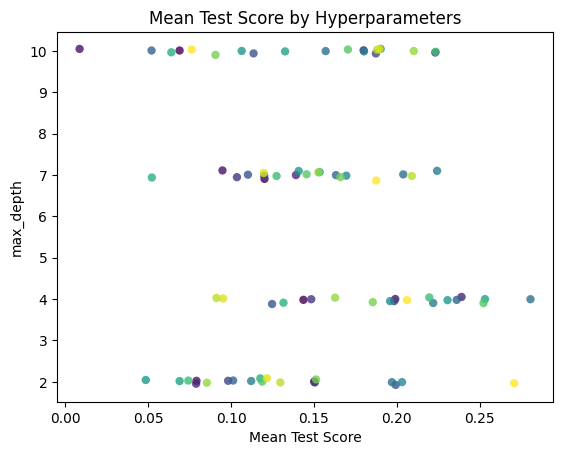

In [175]:
import matplotlib.pyplot as plt
import numpy as np

cv_df = pd.DataFrame(grid_search.cv_results_)

max_depth_values = cv_df['param_max_depth'].unique()

fig, ax = plt.subplots()

for i, max_depth in enumerate(max_depth_values):
    group = cv_df[cv_df['param_max_depth'] == max_depth]
    n_estimators = group['param_n_estimators'].values
    scores = group['mean_test_score'].values
    colors = plt.cm.viridis(np.linspace(0, 1, len(n_estimators)))
    jitter_x = np.random.normal(0, 0.05, len(n_estimators))
    jitter_y = np.random.normal(0, 0.05, len(n_estimators))
    sc = ax.scatter(scores + jitter_x, np.repeat(max_depth, len(scores)) + jitter_y, color=colors, edgecolors='none', alpha=0.8, label=f"max_depth={max_depth}")

ax.set_xlabel('Mean Test Score')
ax.set_ylabel('max_depth')
ax.set_title('Mean Test Score by Hyperparameters')
plt.show()


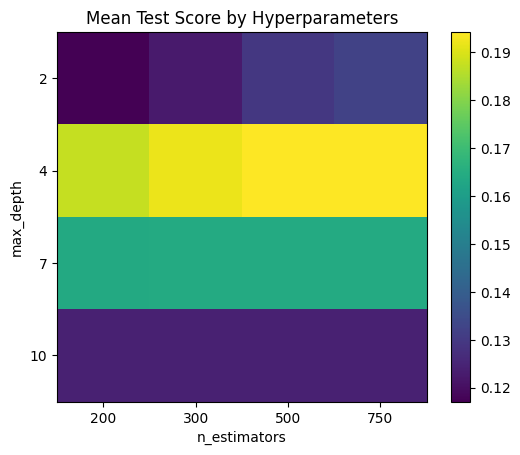

In [161]:
import matplotlib.pyplot as plt

cv_df = pd.DataFrame(grid_search.cv_results_)

scores = cv_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

fig, ax = plt.subplots()
im = ax.imshow(scores, cmap='viridis')

ax.set_xticks(np.arange(len(scores.columns)))
ax.set_yticks(np.arange(len(scores.index)))
ax.set_xticklabels(scores.columns)
ax.set_yticklabels(scores.index)
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_title('Mean Test Score by Hyperparameters')

plt.colorbar(im)
plt.show()
